# Exercise 1 - Advanced Statistics for Physics Analysis (A.Y. 2022-2023)
by Erica Brisigotti (2097202)

In [1]:
library(tidyverse)
library("gridExtra")
library(repr)

SAVE=FALSE

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.2.0
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




## Exercise 1 - American Airlines Employees

The following repository https://drive.google.com/drive/folders/1MBXTCbUJbX6kRo4fnjsbOGvOZZ7SQFkV contains few files with the number of part-time and full-time employees of the major
airline companies in the United States:
- american_airline_empl.txt
- delta_airline_empl.txt
- federal_express_empl.txt
- united_airline_empl.txt

1. Read the data and import them in a data.frame or tibble structure

2. Merge the four data tibble in a common tibble

In [2]:
data_names=c("american_airline_empl.txt","delta_airline_empl.txt","federal_express_empl.txt","united_airline_empl.txt")
var_names=c("american_airline","delta_airline","federal_express","united_airline")
to_change=c("V3","V4","V5")

In [3]:
# I create a dataframe in which I'm going to save information about every dataset
df = data.frame()

# for every dataset
for (dn in 1:length(data_names)) {
# I upload data automatically
    full_name = paste( 'E1_data', data_names[dn],sep='/')
    temp = read.table( full_name, header=FALSE, sep="", skip=1, dec=".")
# and correct the last columns, which are of character type because of the use of a comma as as the thousand separator 
    for (tc in 1:length(to_change)) {
        temp[[to_change[tc]]] <- as.numeric(gsub(",", "", temp[[to_change[tc]]])) }
# I then assign a proper name
    colnames(temp) <- c("Month", "Year", "Full_Time", "Part_Time", "Grand_Total" )
# and also add a column with the name of the company (which is useful since we'll save all the information together)
    temp["Company"] <- rep(c(var_names[dn]), nrow(temp) )    
# and add the above dataframe to the final dataframe 
    df <- df %>% rbind(temp) }

# lastly, in the final dataframe, I combine the Year and Month information into one time coordinate
df["Time"] <- make_date(df$Year, df$Month)
# and drop the single Year and Month columns:
df <- df %>% select(-c(Month, Year))

3.  Produce a plot of the behaviour of the employees as a function of time for all four companies,
separately for the number of full-time and part-time employees

NULL

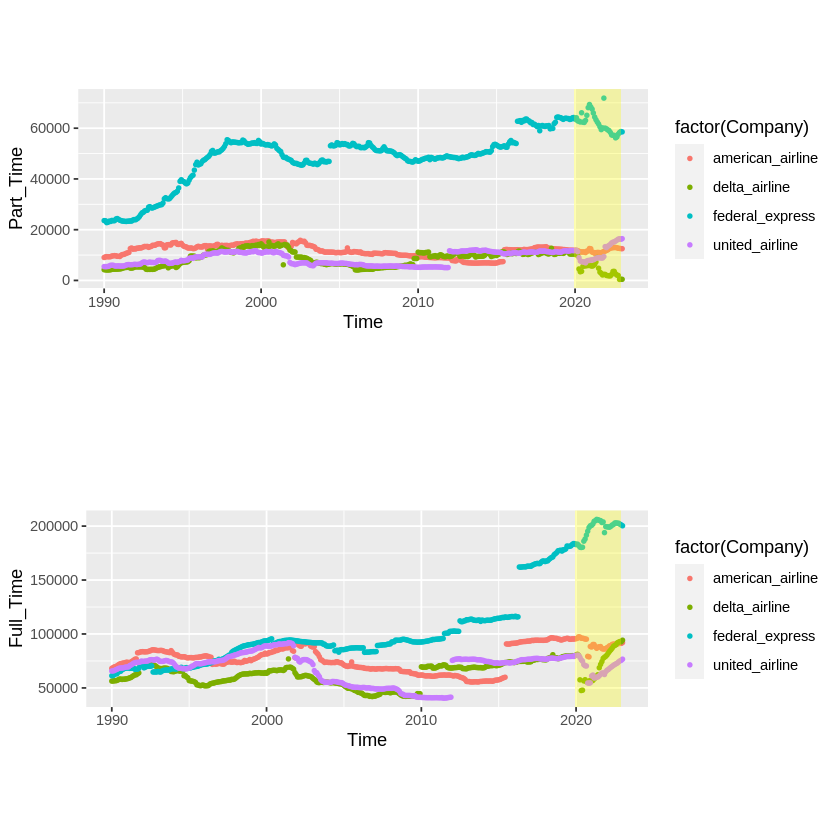

In [4]:
# I select the items to plot and do a scatter plot for each one of them
gg1 <-  ggplot() +
        geom_point(data=df, aes(Time, Part_Time, colour = factor(Company)), shape = 20) +
        theme(aspect.ratio=0.35) +
        geom_rect(data=data.frame(xmin = as.Date("2019-12-01"), xmax = as.Date("2022-12-01"), ymin = -Inf, ymax = Inf),
                                    aes(xmin = xmin, xmax = xmax, ymin = ymin, ymax = ymax), fill = "yellow", alpha = 0.3)
gg2 <-  ggplot() +
        geom_point(data=df, aes(Time, Full_Time, colour = factor(Company)), shape = 20) +
        theme(aspect.ratio=0.35) +
        geom_rect(data=data.frame(xmin = as.Date("2019-12-01"), xmax = as.Date("2022-12-01"), ymin = -Inf, ymax = Inf),
                                    aes(xmin = xmin, xmax = xmax, ymin = ymin, ymax = ymax), fill = "yellow", alpha = 0.3)
# and represent the two plots side by side
grid.arrange(gg1, gg2, nrow = 2) + theme(aspect.ratio = 1)
g1 <- arrangeGrob(gg1, gg2, nrow = 2)
if (SAVE) { ggsave("E1_output/01_workers.pdf", g1, width = 29, height = 20, units = "cm", dpi=500) }

4.  When did each company reach the minimum and maximum number of employess ?

In [5]:
by_company <- df %>% group_by(Company) %>% summarise( min = min(Grand_Total), max = max(Grand_Total),
                                                        when_min = Time[which.min(Grand_Total)], 
                                                        when_max = Time[which.max(Grand_Total)] )
by_company

Company,min,max,when_min,when_max
<chr>,<dbl>,<dbl>,<date>,<date>
american_airline,62290,109171,2013-09-01,2018-06-01
delta_airline,46410,94675,2006-11-01,2023-01-01
federal_express,84885,270383,1990-01-01,2021-03-01
united_airline,45781,102046,2011-06-01,2001-03-01


5. Plot the fraction of part-time worker over the total employess as a function of time

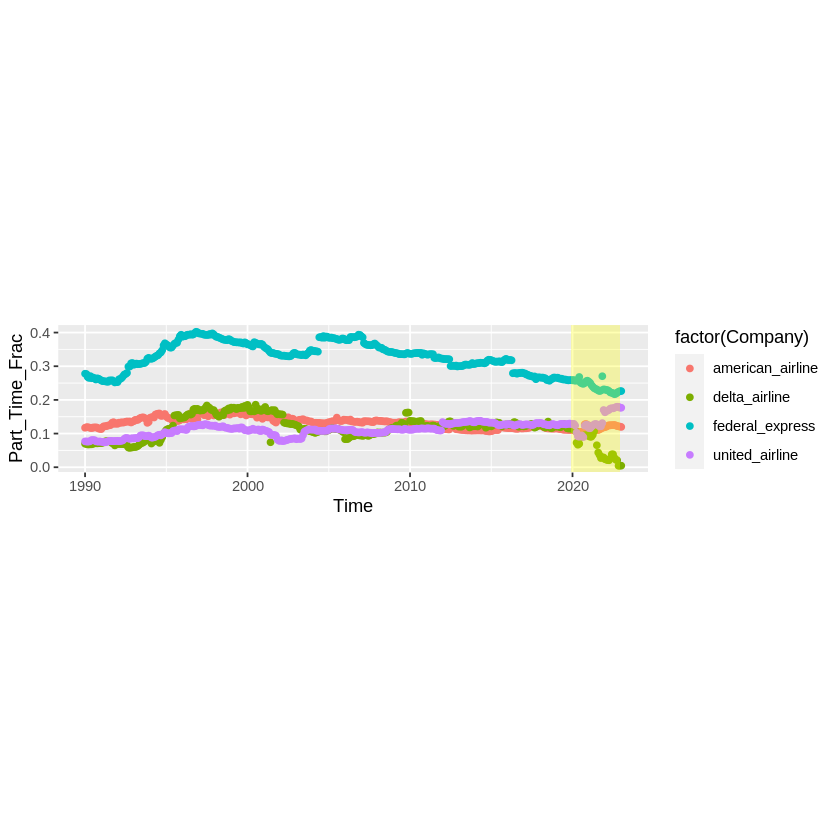

In [6]:
df["Part_Time_Frac"] = df["Part_Time"] /df["Grand_Total"]
g2 <- ggplot() + geom_point(data=df, aes(Time, Part_Time_Frac, colour = factor(Company))) + 
        theme(aspect.ratio=1/4) +
        geom_rect(data=data.frame(xmin = as.Date("2019-12-01"), xmax = as.Date("2022-12-01"), ymin = -Inf, ymax = Inf),
                    aes(xmin = xmin, xmax = xmax, ymin = ymin, ymax = ymax), fill = "yellow", alpha = 0.3)
print(g2)
if (SAVE) { ggsave("E1_output/02_part_time_fraction.pdf", g2, width = 29, height = 20, units = "cm", dpi=500) }

6. Did the COVID-19 pandemic have any influence in the employed workers of the airline companies? Can you see a trend in the years 2019-2023 ?

<span style="color:blue"> The COVID-19 pandemic influenced the number of employers in the following way: </span>
- <span style="color:blue"> for the first year (end 2019-end 2020), there was a decrease in the numbers of both part-time and full-time employes </span>
- <span style="color:blue"> for the second year (end 2020-end 2021), we see an increase in the numbers of both part-time and full-time employes. Such growth more than compensated the termination from the first year: in some cases, this even lead to the highest number ever reached of both part-time and full-time workers. </span>
- <span style="color:blue"> for the third-year (end 2021-end 2022), the need for worker kept increasing: for two of the airlines (United Airline and American Airline) this trend can be easily seen in both the part-time and full-time employes plots. For the remaining ones (Federal Express and Delta Airlines), this trend isn't as visible because of a more subtle choice of policy: absorbing some of the part-time workers into the full-time ones, instead of just adding more workers. This manifests in an increase in the number of full-time workers and a consequent decrease in the number of part-time ones.  </span>

## Exercise 2 - Data Frames and Tibble

The nycflights13 R package [1] contains data on all flights departing from New Your City airports
in 2013. All available data is organized into four tibbles [1] :
- airlines: contains metadata on airlines names and corresponding carrier codes
- airports: contains metadata on all airports connected to NYC
- flights: has data of all flights departing from the three NYC airports (JFK, LGA and EWR) in
2013
- planes: Plane metadata for all plane numbers found in the FAA aircraft registry.
further descriptions can be found here [1].

1.1. Plot the total number of flights departed from each of the three NYC airports as a function of time
(one entry for each of the 365 days of the year).

In [7]:
flights = nycflights13::flights
flights["date"] = make_date(year=flights$year, month=flights$month, day=flights$day)
from_NYC <- flights %>% filter(origin %in% c("JFK")) %>% group_by(date) %>% summarise(JFK = n())
from_NYC["LGA"] <- flights %>% filter(origin %in% c("LGA")) %>% group_by(date) %>% summarise(LGA = n()) %>% select(LGA)
from_NYC["EWR"] <- flights %>% filter(origin %in% c("EWR")) %>% group_by(date) %>% summarise(EWR = n()) %>% select(EWR)

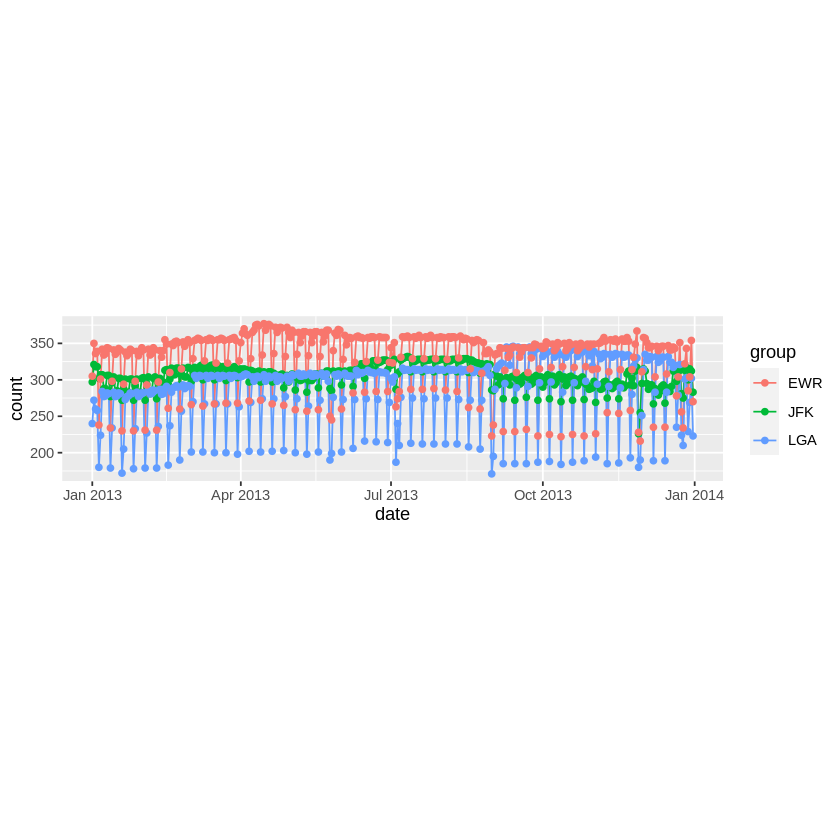

In [8]:
from_NYC_plot = data.frame( date=from_NYC$date, count=c(from_NYC$JFK ,from_NYC$LGA, from_NYC$EWR),
                           group = c(rep("JFK", nrow(from_NYC)), rep("LGA", nrow(from_NYC)), rep("EWR", nrow(from_NYC))))
g3 <- ggplot(from_NYC_plot, aes(date, count, col = group)) + geom_line(aes(group = group)) + geom_point() + 
        theme(aspect.ratio = 1/4)
print(g3)
if (SAVE) { ggsave("E1_output/03_count_per_airport.pdf", g3, width = 29, height = 20, units = "cm", dpi=500) }

1.2.  Plot the average number of flights computed over the first five working days of each week as a
function of the week number of the year. Produce the same plot for the flights departing over the
weekend (Saturdays and Sundays).

In [9]:
per_day <- flights %>% group_by(date) %>% summarise(count = n()) 
per_day["week"] <- strftime(per_day$date, format = "%V")
per_day["day_of_week"] <- factor(weekdays(per_day$date))
average <- per_day %>% filter(day_of_week %in% c("Monday","Tuesday","Wednesday","Thursday","Friday")) %>%
    group_by(week) %>% summarise(weekday = mean(count,na.rm=TRUE))
average["weekend"] <- per_day %>% filter(day_of_week %in% c("Saturday","Sunday")) %>%
    group_by(week) %>% summarise(weekend = mean(count,na.rm=TRUE)) %>% select(weekend)
average["all_week"] <- per_day %>% group_by(week) %>% summarise(all_week = mean(count,na.rm=TRUE)) %>% select(all_week)

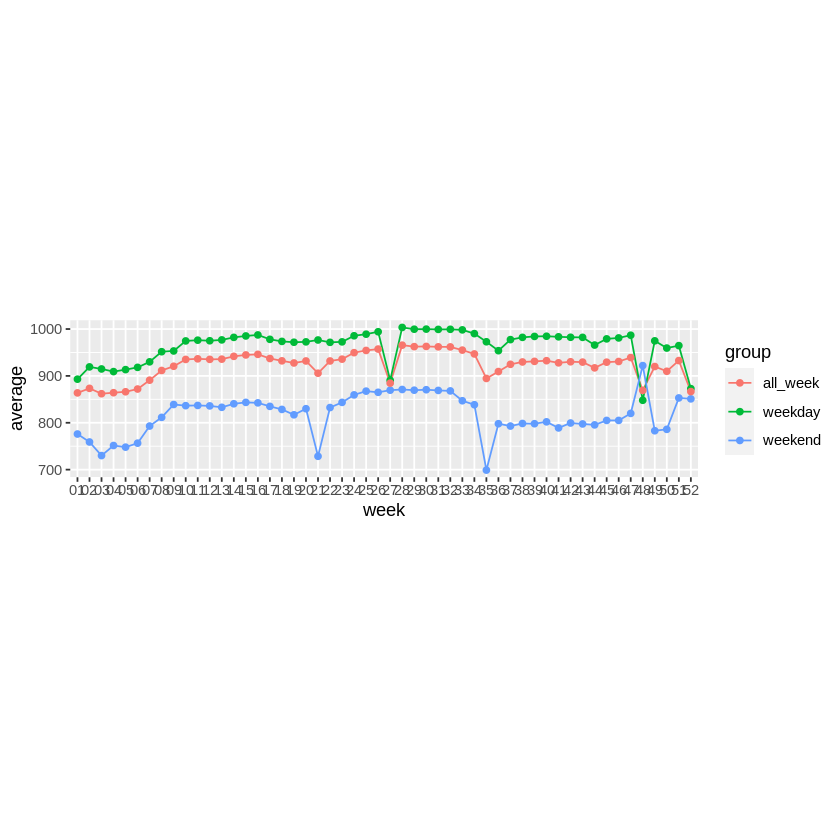

In [10]:
average_plot = data.frame( week=average$week, average=c(average$weekday, average$weekend, average$all_week),
                          group=c(rep("weekday",nrow(average)), rep("weekend",nrow(average)), rep("all_week",nrow(average))))
g4 <- ggplot(average_plot, aes(week, average, col = group)) + geom_line(aes(group = group)) + geom_point() + 
        theme(aspect.ratio = 1/4)
print(g4)
if (SAVE) { ggsave("E1_output/04_average_per_week.pdf", g4, width = 29, height = 20, units = "cm", dpi=500) }

2.1.  For each flight in the data frame, compute the departure delay [1] and extract the following pieces of
information (separately for each NYC airport): min, max and average delay for each day of the year (show the data in corresponding plots)


Warning message:
“There were 2 warnings in `summarise()`.
The first warning was:
ℹ In argument: `min_delay = min(dep_delay, na.rm = TRUE)`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning.”


NULL

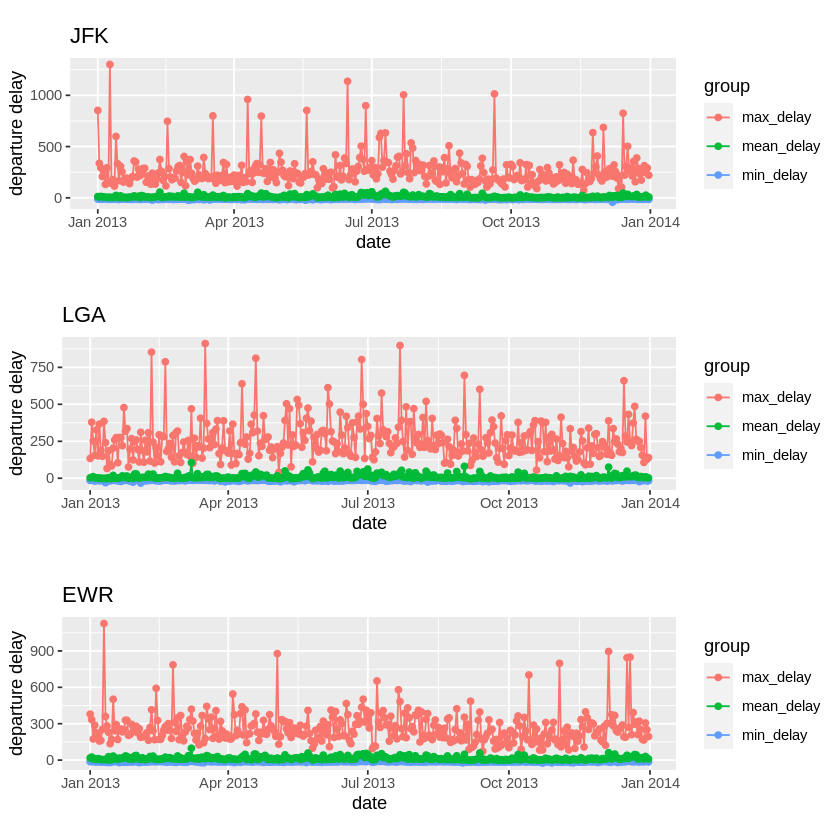

In [11]:
NYC_names = c("JFK","LGA","EWR")
for (i in 1:length(data_names)) {
    airport_name = paste( 'per_day', NYC_names[i], sep='_')
    per_day_temp <- flights %>% filter(origin %in% c(NYC_names[i])) %>% group_by(date) %>% 
        summarise(min_delay=min(dep_delay, na.rm=TRUE), max_delay=max(dep_delay, na.rm=TRUE), 
                  mean_delay=mean(dep_delay,na.rm=TRUE))
    assign(airport_name,per_day_temp)
    temp = data.frame( x=per_day_temp$date, y=c(per_day_temp$min_delay, per_day_temp$max_delay, per_day_temp$mean_delay),
                        group=c(rep("min_delay",nrow(per_day_temp)), rep("max_delay",nrow(per_day_temp)), 
                                  rep("mean_delay",nrow(per_day_temp))))
    temp_plot <- ggplot(temp, aes(x, y, col=group)) + geom_line(aes(group=group)) + geom_point() + theme(aspect.ratio=1/4) +
                    ggtitle(NYC_names[i]) + xlab("date") + ylab("departure delay")
    assign(paste('plot', NYC_names[i], sep='_'),temp_plot) }

grid.arrange(plot_JFK, plot_LGA, plot_EWR, nrow = 3) + theme(aspect.ratio = 1)
g5 <- arrangeGrob(plot_JFK, plot_LGA, plot_EWR, nrow = 3)
if (SAVE) { ggsave("E1_output/05_dep_delay_per_airport.pdf", g5, width = 29, height = 20, units = "cm", dpi=500) }

3. Assuming the distance flew by the plane is, at first approximation, the distance between the two connecting airports (as given in the data frame), compute the average speed of each plane. Produce a plot of the average plane speed as a function of departure day of the year

In [12]:
flights["speed"] <- flights["distance"] / flights["air_time"] 
temp <- flights %>% select(c(date,speed)) %>% group_by(date) %>% summarize(mean_speed=mean(speed,na.rm=TRUE))

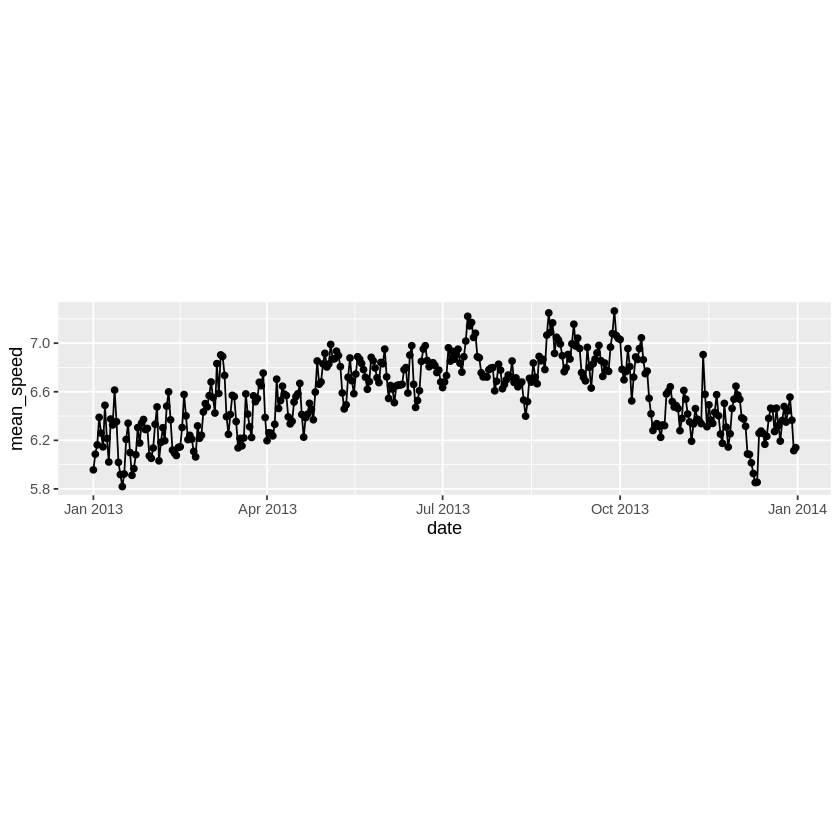

In [13]:
g6 <- ggplot(temp, aes(date, mean_speed)) + geom_line() + geom_point() + theme(aspect.ratio = 1/4)
print(g6)
if (SAVE) { ggsave("E1_output/06_mean_speed_per_day.pdf", g6, width = 29, height = 20, units = "cm", dpi=500) }

4. Analyze the flights offered by each airline company and determine:
    - the airline companies offering the largest two numbers of flights per day and per week;
    - the airline company offering the smallest number of flight per month;
    - the airline company offering the longest distance flight per month.

   (you can produce plots, if you like, to visualize the results of the analysis)

Hint: use the tidyverse packages to manipulate the data frame and produce the visualization plots (i.e.
dplyr, ggplot2, . . .)

In [14]:
nycflights13::airlines

carrier,name
<chr>,<chr>
9E,Endeavor Air Inc.
AA,American Airlines Inc.
AS,Alaska Airlines Inc.
B6,JetBlue Airways
DL,Delta Air Lines Inc.
EV,ExpressJet Airlines Inc.
F9,Frontier Airlines Inc.
FL,AirTran Airways Corporation
HA,Hawaiian Airlines Inc.


`summarise()` has grouped output by 'carrier'. You can override using the `.groups` argument.


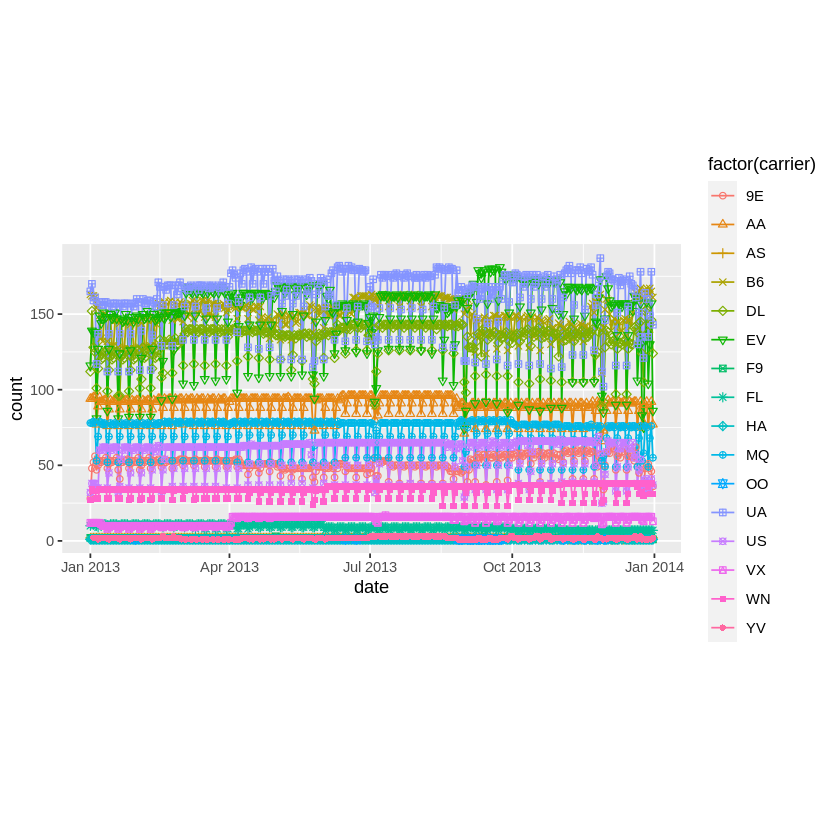

In [15]:
flights["week"] <- strftime(flights$date, format = "%V")
per_carrier_per_day <- flights %>% select(c(date,carrier)) %>% group_by(carrier,date) %>% summarize(count = n())
g7 <- ggplot(per_carrier_per_day, aes(date, count)) + geom_line(aes(colour=factor(carrier), group=factor(carrier))) + 
        geom_point(aes(colour = factor(carrier),shape=factor(carrier))) + theme(aspect.ratio = 1/2) +
        scale_shape_manual(values = 1:nlevels(factor(per_carrier_per_day$carrier)))
print(g7)
if (SAVE) { ggsave("E1_output/07_count_per_day.pdf", g7, width = 29, height = 20, units = "cm", dpi=500) }

<span style="color:blue"> The two companies with the most flights per day are UA (United Air Lines) and EV (ExpressJet Airlines). </span>

`summarise()` has grouped output by 'carrier'. You can override using the `.groups` argument.


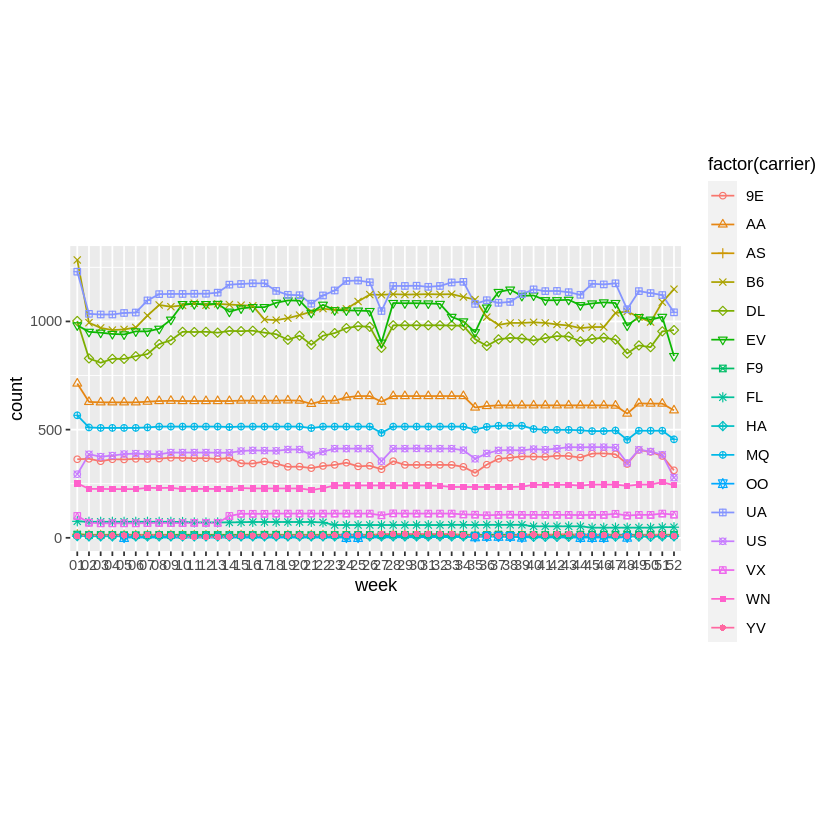

In [16]:
per_carrier_per_week <- flights %>% select(c(week,carrier,distance)) %>% group_by(carrier, week) %>% 
    summarize(count=n())
g8 <- ggplot(per_carrier_per_week, aes(week, count)) + geom_line(aes(colour=factor(carrier), group=factor(carrier))) + 
        geom_point(aes(colour = factor(carrier),shape=factor(carrier))) + theme(aspect.ratio = 1/2) +
        scale_shape_manual(values = 1:nlevels(factor(per_carrier_per_week$carrier)))
print(g8)
if (SAVE) { ggsave("E1_output/08_count_per_week.pdf", g8, width = 29, height = 20, units = "cm", dpi=500) }

<span style="color:blue"> The two companies with the most flights per week are, still, UA (United Air Lines) and EV (ExpressJet Airlines). </span>

`summarise()` has grouped output by 'carrier'. You can override using the `.groups` argument.


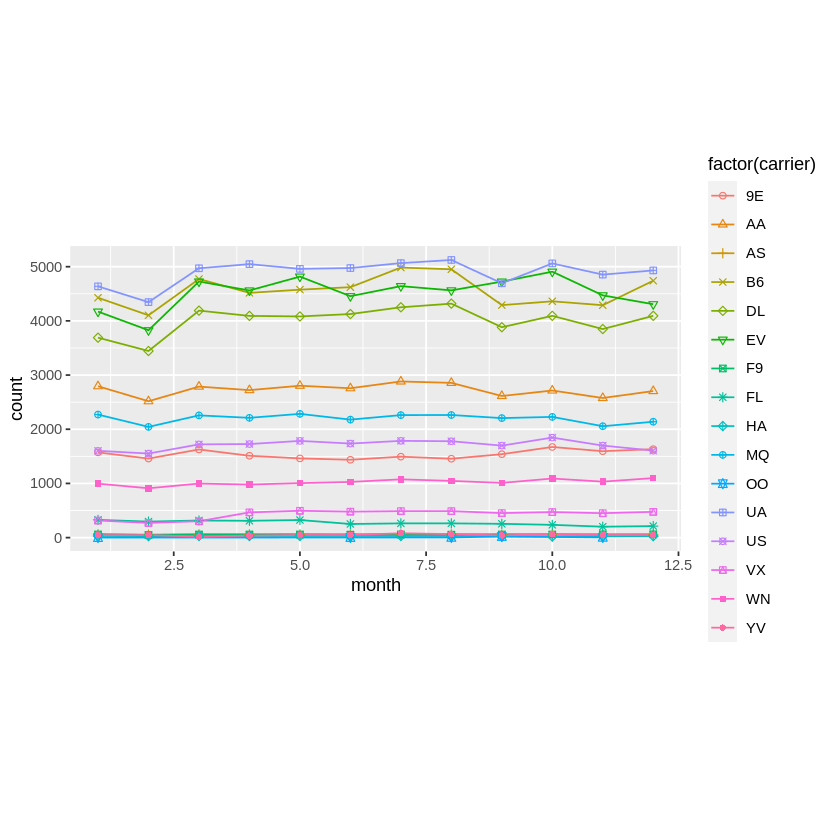

In [17]:
per_carrier_per_month <- flights %>% select(c(month,carrier,distance)) %>% group_by(carrier, month) %>% 
    summarize(count=n(), max_dist=max(distance,rm.na=TRUE))
g9 <- ggplot(per_carrier_per_month, aes(month, count)) + geom_line(aes(colour=factor(carrier), group=factor(carrier))) + 
        geom_point(aes(colour = factor(carrier),shape=factor(carrier))) + theme(aspect.ratio = 1/2) +
        scale_shape_manual(values = 1:nlevels(factor(per_carrier_per_month$carrier)))
print(g9)
if (SAVE) { ggsave("E1_output/09_count_per_month.pdf", g9, width = 29, height = 20, units = "cm", dpi=500) }

<span style="color:blue"> The company offering the smallest number of flights per month is OO (SkyWest Airlines). </span>

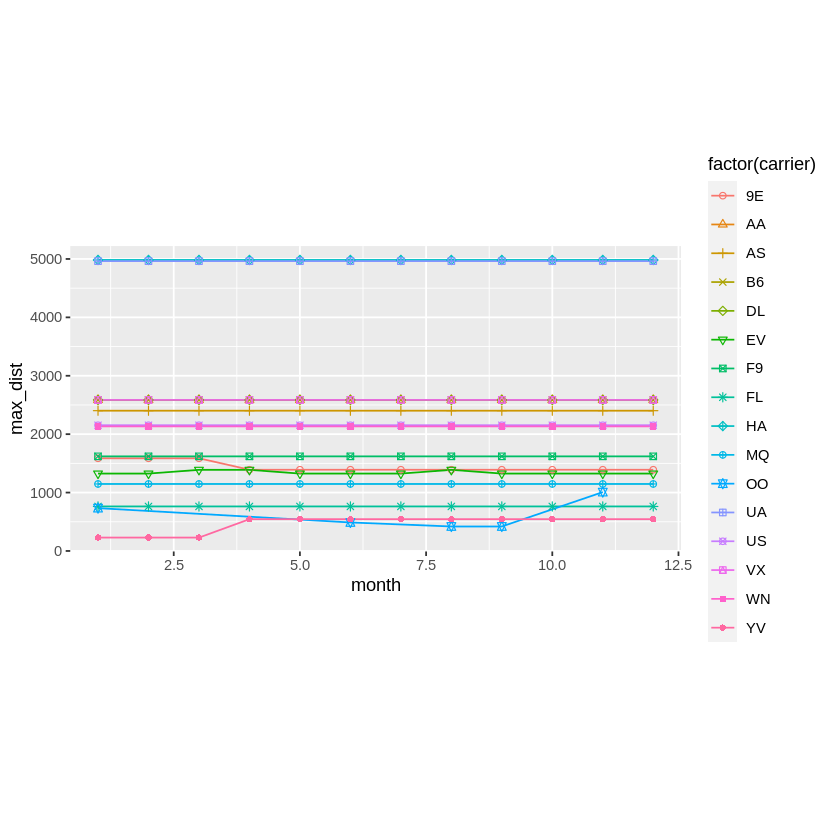

In [18]:
g10 <- ggplot(per_carrier_per_month, aes(month, max_dist)) + geom_line(aes(colour=factor(carrier), group=factor(carrier))) + 
        geom_point(aes(colour = factor(carrier),shape = factor(carrier))) + theme(aspect.ratio = 1/2) +
        scale_shape_manual(values = 1:nlevels(factor(per_carrier_per_month$carrier)))
print(g10)
if (SAVE) { ggsave("E1_output/10_distance_per_month.pdf", g10, width = 29, height = 20, units = "cm", dpi=500) }

<span style="color:blue"> The company offering the longest distance flight per month is HA (Hawaiian Air Lines), but UA (United Air Lines) is a very close second. </span>

## References
[1] https://cran.r-project.org/web/packages/nycflights13/nycflights13.pdf